<a href="https://colab.research.google.com/github/erika-munho/TalentoTech/blob/main/Clustering_IRIS_K_MEANS_%2B_PCA_or_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports and global settings**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.decomposition import PCA
!pip install umap-learn
import umap

from sklearn.cluster import KMeans

import random

std_figure_size = (8,5)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

fixed_random_state = random.seed(42)

%config IPCompleter.use_jedi=False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.7 MB/s eta 0:00:00


**Reading in the dataset**

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Any duplicate rows?**

In [ ]:
n_dup = len(iris) - len(iris.drop_duplicates())

print(f"Number of duplicate rows: {n_dup}")

Number of duplicate rows: 1


**Any missing values?**

In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Checking data types**

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Eliminar la columna categórica 'C' del DataFrame
iris_n = iris.drop(columns=['species'])

iris_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Cleaning up column names (mainly for handling purposes)**

In [ ]:
cols_cleaned = []

for col in iris_n.columns:
    cols_cleaned.append(col.strip().lower())

iris_n.columns = cols_cleaned

# sanity check
iris_n.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Quick overview over the individual distributions**

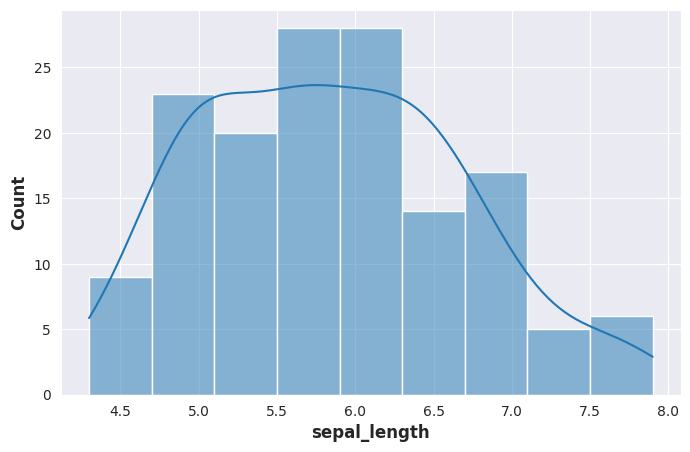

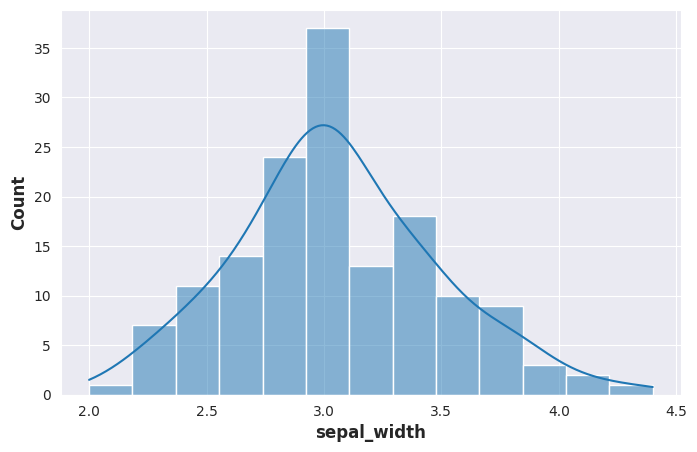

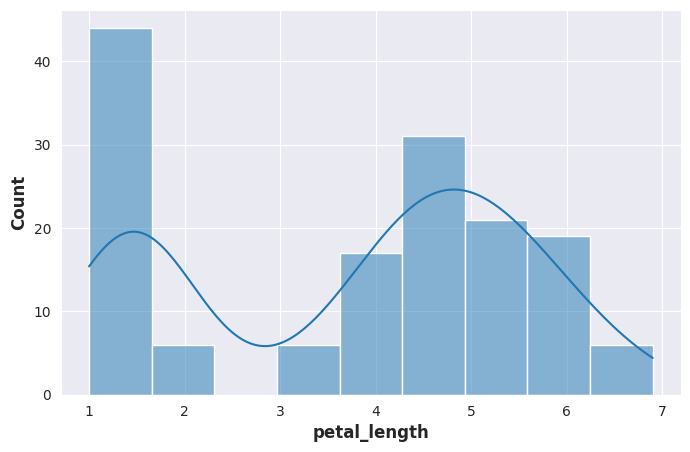

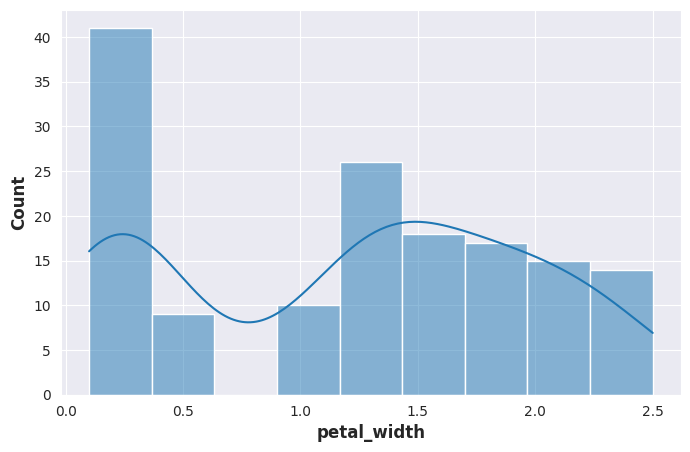

In [ ]:
for col in iris_n.columns:
    fig, axs = plt.subplots(figsize=std_figure_size)
    sns.histplot(data=iris_n, x=col, kde=True, ax=axs)
    plt.show()

===> distributions require scaling and standardization

In [ ]:
X = iris_n.copy()

# Clustering

## Scaling and Standardizing

In [ ]:
X = StandardScaler().fit_transform(iris_n)

In [ ]:
X = PowerTransformer(standardize=False).fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=iris_n.columns)

# sanity check
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.972914,0.953811,-1.120641,-1.222596
1,-1.254819,-0.133410,-1.120641,-1.222596
2,-1.543675,0.320242,-1.161675,-1.222596
3,-1.690529,0.097427,-1.079229,-1.222596
4,-1.112958,1.156179,-1.120641,-1.222596


# Attempt 1: K-means without any prior dimensionality reduction

**Identifying the "optimal" number of clusters**

In [ ]:
inertias_1 = []
range_clusters_1 = np.arange(2, 10, dtype=int)

for n in range_clusters_1:
    kmeans_1 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X)
    inertias_1.append(kmeans_1.inertia_)

# inertias_1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

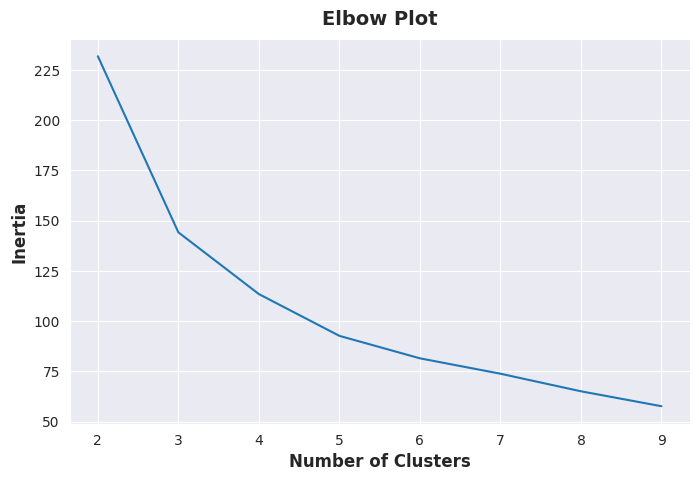

In [ ]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_1, y=inertias_1)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
# plt.ylim(bottom=0)
plt.show()

"kink" at 3 components

**Clustering**

In [ ]:
labels_1 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Reduction to 2 dimensions after clustering so to be able to plot the results

In [ ]:
reducer_1 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_1 = reducer_1.fit_transform(X)

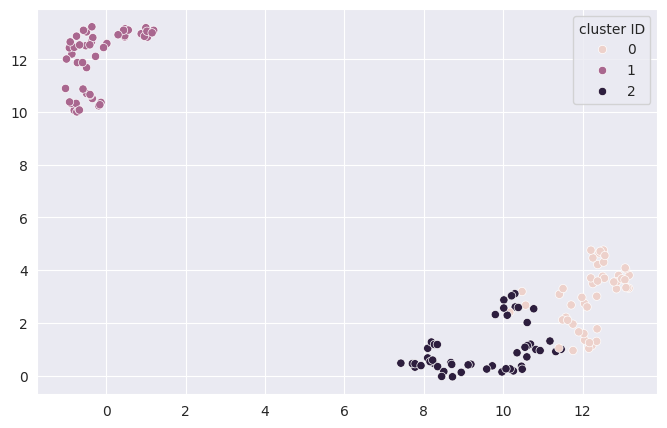

In [ ]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_1[:, 0], y=embedding_1[:, 1], hue=labels_1)
plt.legend(title="cluster ID")
plt.show()

# Attempt 2: K-means with prior dimensionality reduction via PCA

**Identifying the "optimal" number of (principal) components to keep**

In [ ]:
pca_2 = PCA(n_components=4, random_state=fixed_random_state).fit(X)

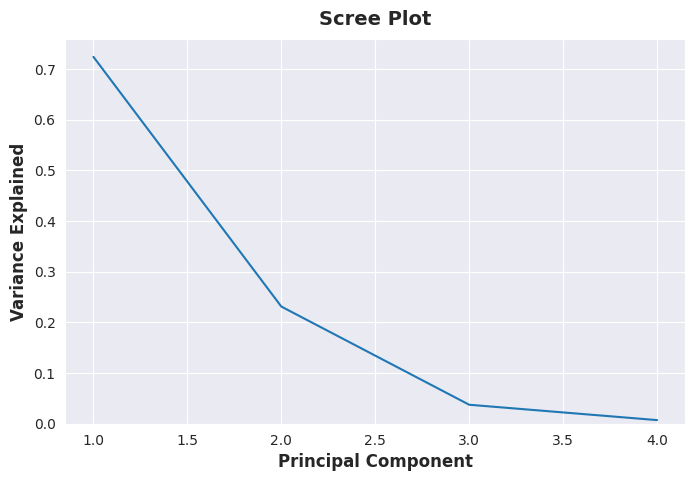

In [ ]:
princ_comps_2 = np.arange(pca_2.n_components_, dtype=int) + 1

fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=princ_comps_2, y=pca_2.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(bottom=0)
plt.show()

"kink" at 2 components

**Reduction to 2 dimensions**

In [ ]:
X_red_2 = PCA(n_components=2, random_state=fixed_random_state).fit_transform(X)

In [ ]:
X_red_2 = pd.DataFrame(X_red_2, columns=["pc1", "pc2"])

X_red_2.head()

,pc1,pc2
0,-2.177494,-0.541963
1,-2.065278,0.575367
2,-2.352547,0.239947
3,-2.329401,0.493715
4,-2.301029,-0.688813


**Identifying the "optimal" number of clusters**

In [ ]:
inertias_2 = []
range_clusters_2 = np.arange(2, 10, dtype=int)

for n in range_clusters_2:
    kmeans_2 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X_red_2)
    inertias_2.append(kmeans_2.inertia_)

# inertias_2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

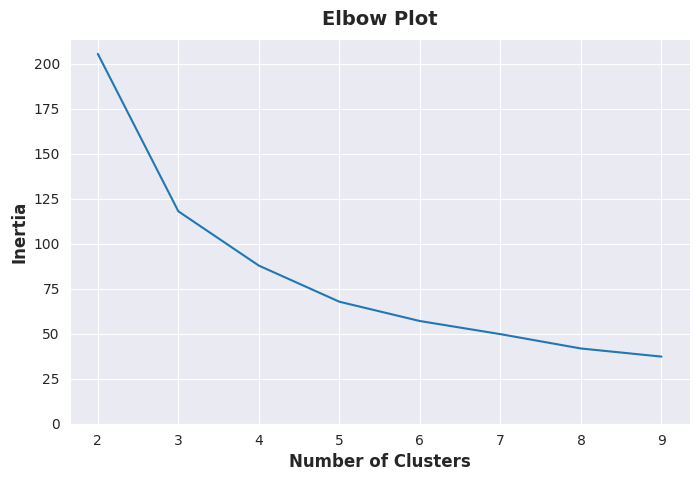

In [ ]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_2, y=inertias_2)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ylim(bottom=0)
plt.show()

"kink" at 3 clusters

**Clustering on dataset with reduced dimensions**

In [ ]:
labels_2 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(X_red_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Reduction to 2 dimensions after clustering so to be able to plot the results

In [ ]:
reducer_2 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_2 = reducer_2.fit_transform(X_red_2)

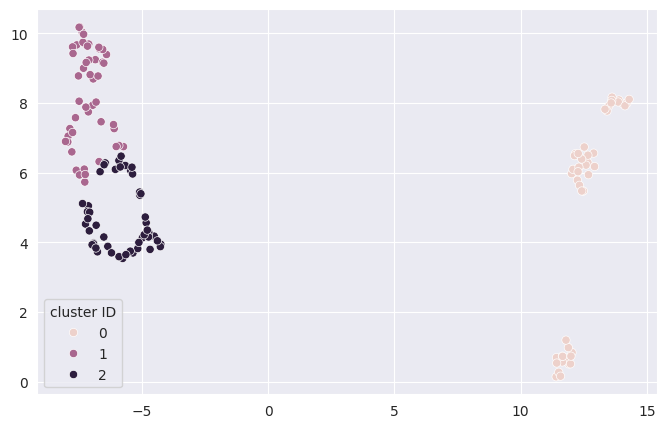

In [ ]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_2[:, 0], y=embedding_2[:, 1], hue=labels_2)
plt.legend(title="cluster ID")
plt.show()

# Attempt 3: K-means with prior dimensionality reduction via UMAP

**Reduction to 2 dimensions**

In [ ]:
reducer_3 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_3 = reducer_3.fit_transform(X)

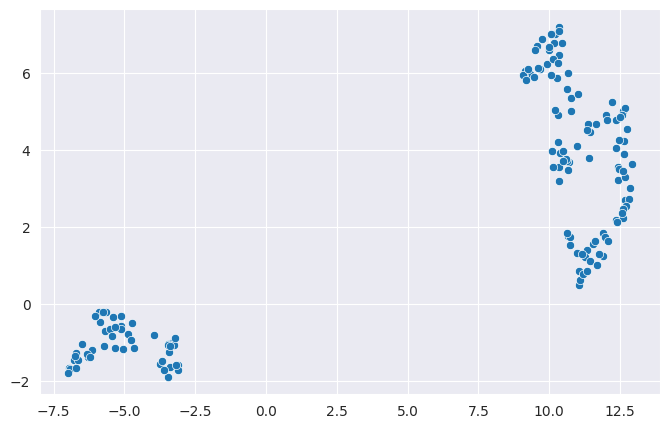

In [ ]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_3[:, 0], y=embedding_3[:, 1])
plt.show()

In [ ]:
X_red_3 = pd.DataFrame(embedding_3, columns=["comp_1", "comp_2"])

# sanity check
X_red_3.head()

,comp_1,comp_2
0,-5.677981,-0.710615
1,-3.341786,-1.010822
2,-3.733727,-1.561891
3,-3.381433,-1.646181
4,-5.717030,-1.097387


**Identifying the "optimal" number of clusters**

In [ ]:
inertias_3 = []
range_clusters_3 = np.arange(2, 10, dtype=int)

for n in range_clusters_3:
    kmeans_3 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X_red_3)
    inertias_3.append(kmeans_3.inertia_)

# inertias_3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

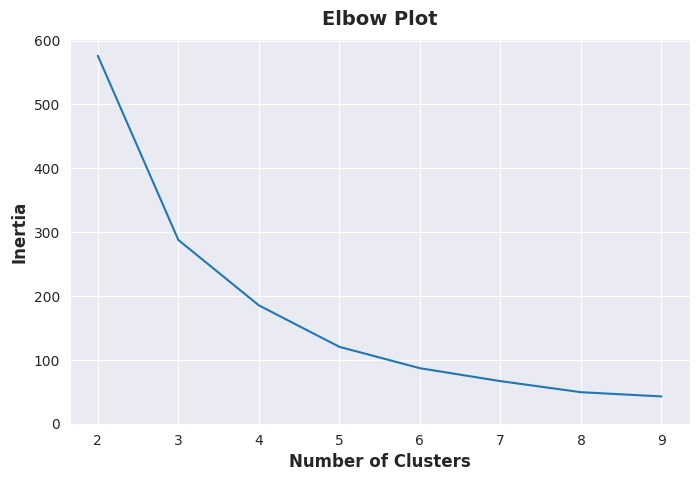

In [ ]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_3, y=inertias_3)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ylim(bottom=0)
plt.show()

"kink" at 3 clusters

**Clustering on dataset with reduced dimensions**

In [ ]:
labels_3 = KMeans(n_clusters=3, random_state=fixed_random_state).fit_predict(X_red_3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


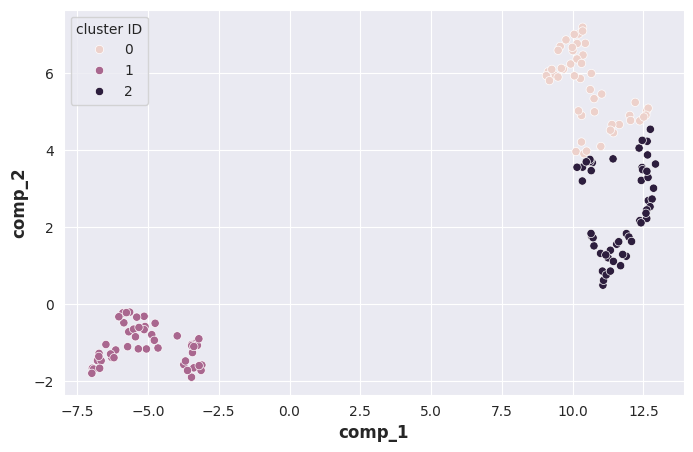

In [ ]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(data=X_red_3, x="comp_1", y="comp_2", hue=labels_3)
plt.legend(title="cluster ID")
plt.show()

# Comparision of the different approaches

**Re-plotting the identified clusters by each approach side-by-side for convenience**

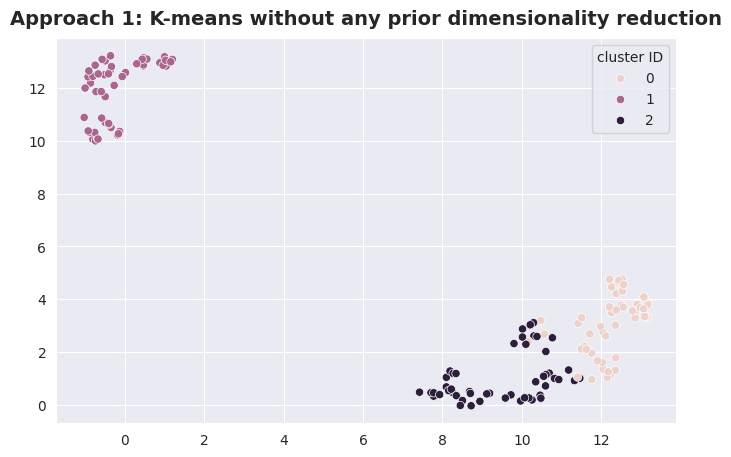

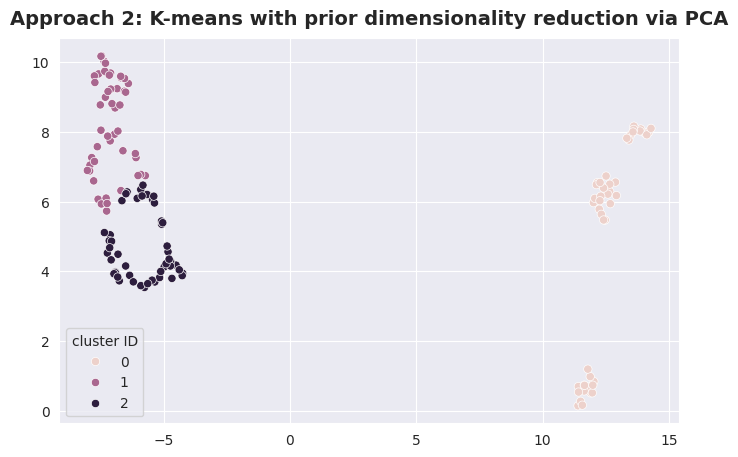

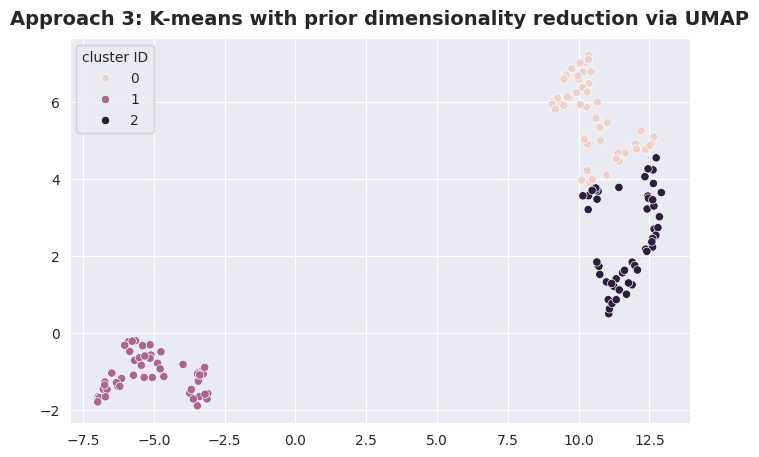

In [ ]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_1[:, 0], y=embedding_1[:, 1], hue=labels_1)
plt.title("Approach 1: K-means without any prior dimensionality reduction")
plt.legend(title="cluster ID")
plt.show()

plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_2[:, 0], y=embedding_2[:, 1], hue=labels_2)
plt.title("Approach 2: K-means with prior dimensionality reduction via PCA")
plt.legend(title="cluster ID")
plt.show()

plt.figure(figsize=std_figure_size)
sns.scatterplot(data=X_red_3, x="comp_1", y="comp_2", hue=labels_3)
plt.title("Approach 3: K-means with prior dimensionality reduction via UMAP")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="cluster ID")
plt.show()

Los tres enfoques generan resultados razonables, en el primero y segundo se obeservan pequeños solapamientos, por tanto el tercer enfoque es ligeramente superior.

**Comparing the elbow plots for each "optimal number of clusters" search side-by-side**

As a reminder, k-means' inertia metric is *not* normalized.

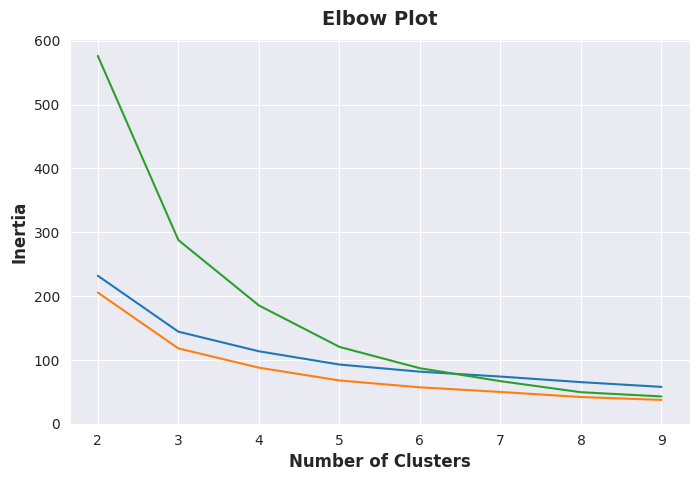

In [ ]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_1, y=inertias_1)
sns.lineplot(x=range_clusters_2, y=inertias_2)
sns.lineplot(x=range_clusters_3, y=inertias_3)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ylim(bottom=0)
plt.show()

**Swapping cluster IDs so to make the results for the 3 approaches directly comparable**

Taking the label IDs as generated by "approach 1" as reference.

In [ ]:
def corr_labels_2(elem):
    if elem == 1:
        return 2
    elif elem == 2:
        return 1
    else:
        return elem


labels_2 = pd.Series(labels_2).apply(corr_labels_2)

In [ ]:
def corr_labels_3(elem):
    if elem == 1:
        return 0
    elif elem == 0:
        return 1
    else:
        return elem


labels_3 = pd.Series(labels_3).apply(corr_labels_3)

**Side-by-side comparison of the feature distributions for each cluster across all 3 approaches**

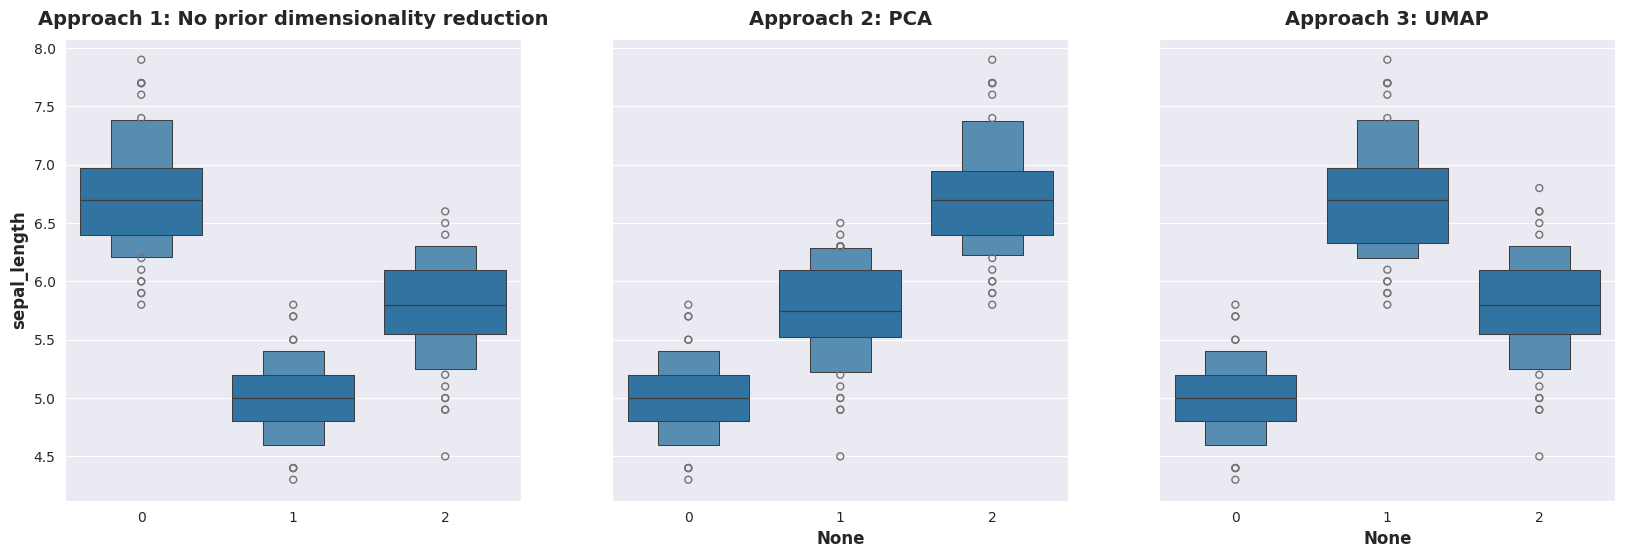

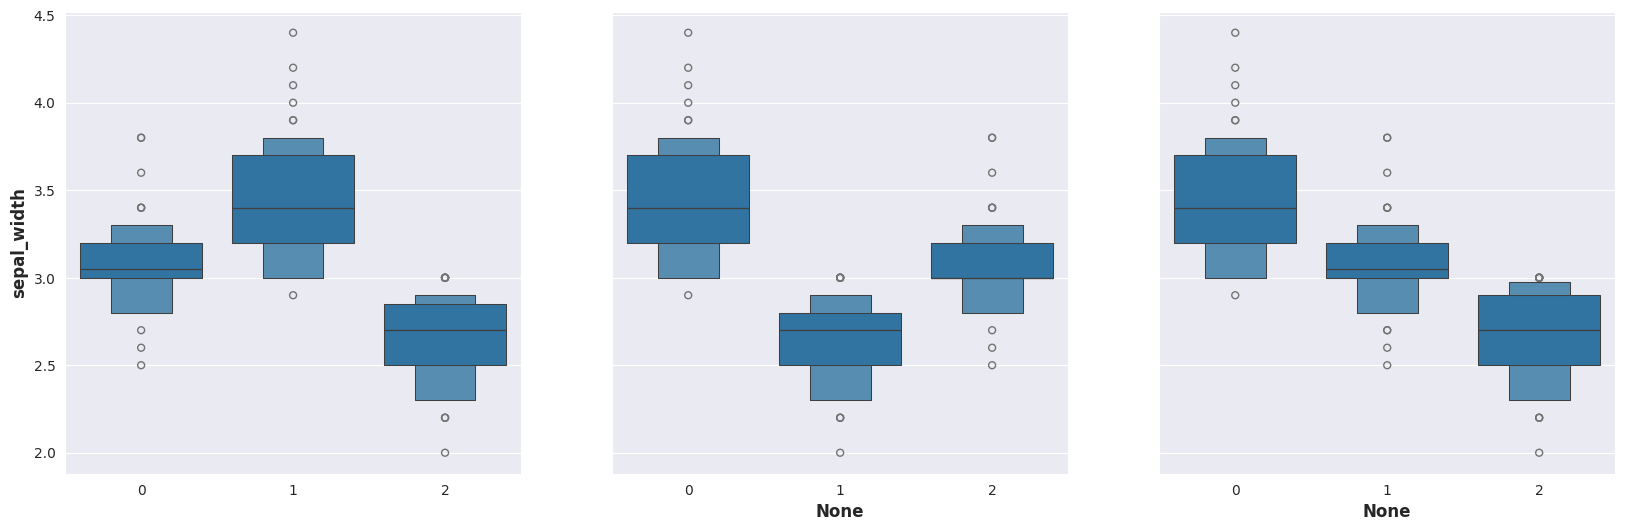

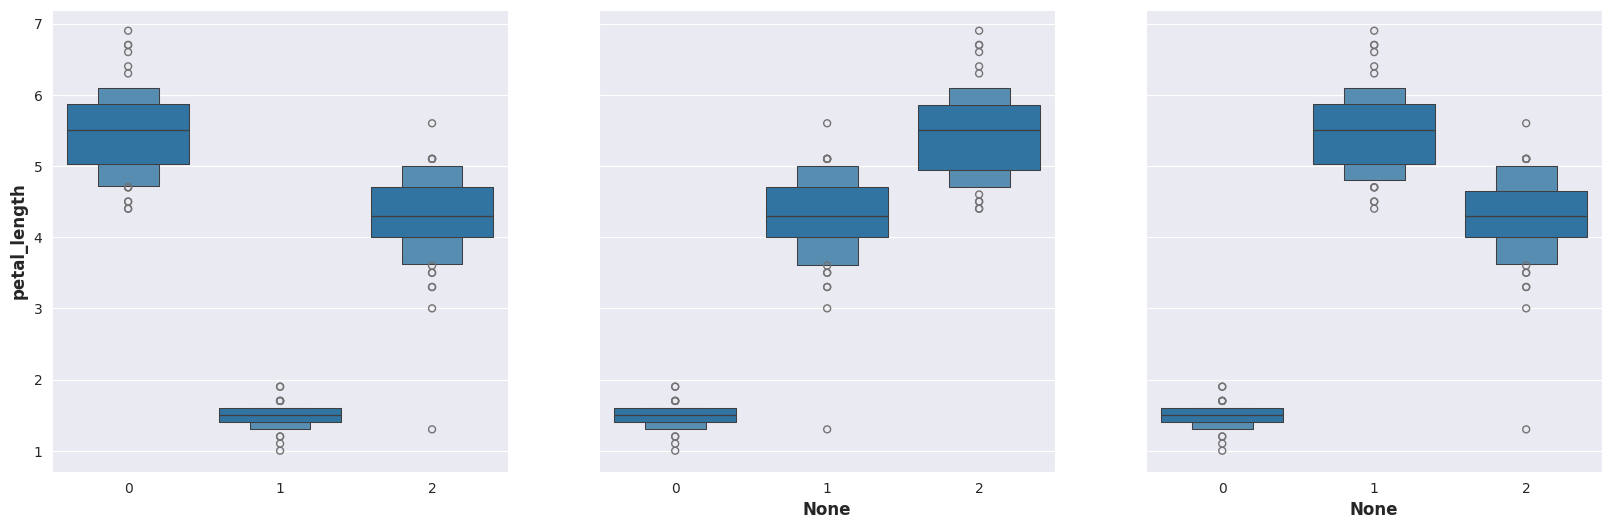

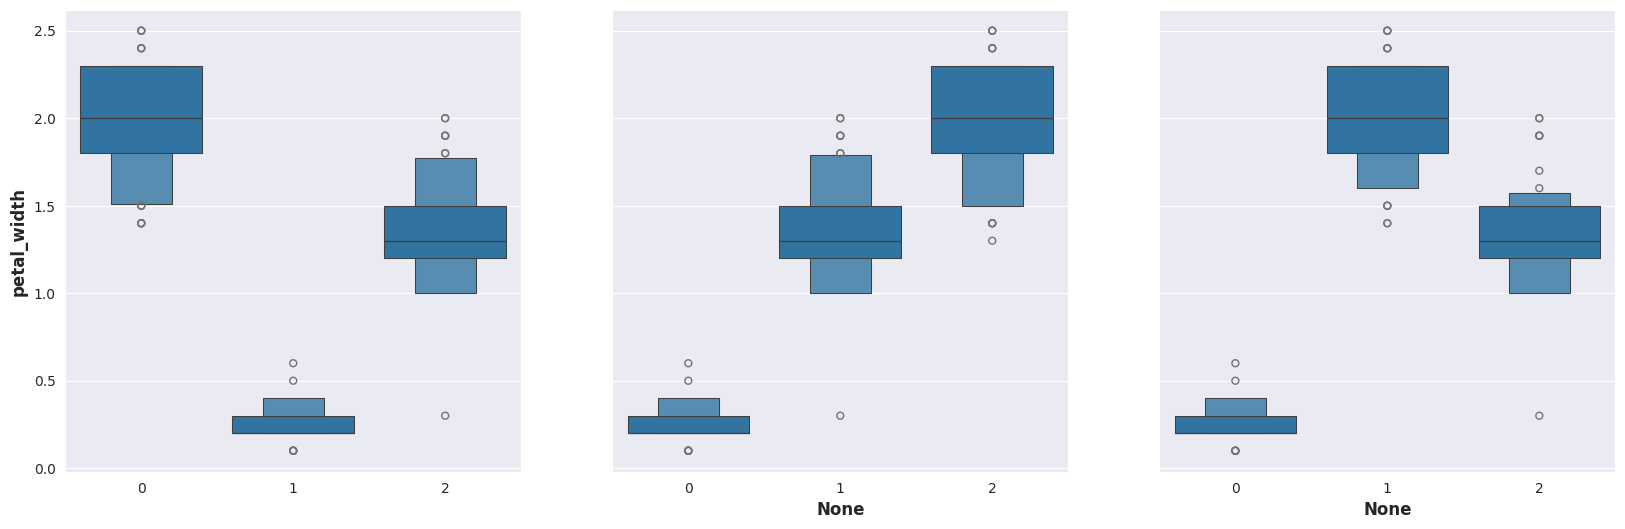

In [ ]:
for i, col in enumerate(iris_n.columns):
    fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20,6))
    sns.boxenplot(x=labels_1, y=iris_n[col], ax=axs[0])
    sns.boxenplot(x=labels_2, y=iris_n[col], ax=axs[1])
    sns.boxenplot(x=labels_3, y=iris_n[col], ax=axs[2])
    if i == 0:
        axs[0].set_title("Approach 1: No prior dimensionality reduction")
        axs[1].set_title("Approach 2: PCA")
        axs[2].set_title("Approach 3: UMAP")
    plt.show()

**How many data points are there in each cluster for each approach?**

In [ ]:
counts_1 = pd.Series(labels_1).value_counts().sort_index()
counts_2 = pd.Series(labels_2).value_counts().sort_index()
counts_3 = pd.Series(labels_3).value_counts().sort_index()

cluster_counts = pd.DataFrame({"app_1": counts_1, "app_2": counts_2, "app_3": counts_3})

cluster_counts.index.name = "cluster_id"

cluster_counts

,app_1,app_2,app_3
cluster_id,,,
0,50,49,49
1,49,50,50
2,51,51,51


Muy similar e identico para el cluster 3 con los tres enfoques

CONCLUSION

Aplicando el metodo K-means sin reduccion previa de dimensionalidad y con  previa reduccion aplicando PCA y UMAP al dataset de Iris, se observa resultados similares para el agrupamiento de los datos en tres conglomerados
